# View GCaMP mismatch closed and open loop seesion 1 and 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr, spearmanr
from analysis_functions import *
from model_functions import *
import matplotlib.patches as patches
import seaborn as sns

In [6]:
RunTresholdDict = {'B3M1': 145, 'B3M2': 295, 'B3M3': 325, 'B2M4': 110, 'B2M5': 180}

In [65]:
B3M3_data_test = pd.read_csv('B3M3_G8_MMclosed_session1.csv', dtype=dtype_dict)
# GCaMP_MM_2 = pd.read_csv('GCaMP_MMclosed_open_session2.csv', dtype=dtype_dict)

In [66]:
# Chaning event name to halt and making it so that its True when there is a halt
#B3M3_data_test.loc[:, 'event'] = B3M3_data_test['event'].replace({False: True, True: False})
B3M3_data_test.rename(columns = {'event': 'halt'}, inplace = True)
# GCaMP_MM_2.rename(columns = {'event': 'halt'}, inplace = True)


In [67]:
#Make sure the index provides inforamtion of seconds since start
B3M3_data_test.set_index('Seconds', inplace=True)
# GCaMP_MM_2.set_index('Seconds', inplace=True)


In [68]:
#Check that the same mice are in the datsets
print(B3M3_data_test.mouseID.unique())
# print(GCaMP_MM_2.mouseID.unique())


['B3M3']


In [69]:
B3M3_data_test['session']

KeyError: 'session'

## View session data
- Loop through the mouse names present in one of the dataframes (ideally they should be the same)
- save a variable where each session is saved for the current mouse
- use the view_session_mouse() funciton from analysis_functions.py to plot the Delta F/F 470 fluorescence and movement in X direction with halts in grey, and session blocks marked in colors.
- Edit the function to plot different fluorescence traces, movements, and eyes.
- This is mostly to get an impression of the overall data trends.

In [70]:
mousedata

{'session 1':            470_dfF  movementX  movementY   halt ExperimentEvents mouseID sex  \
 Seconds                                                                        
 0.000    -0.000071   0.007848   0.003241  False              NaN    B3M3   F   
 0.001    -0.000228   0.025288   0.010443  False              NaN    B3M3   F   
 0.002    -0.000385   0.042729   0.017645  False              NaN    B3M3   F   
 0.003    -0.000542   0.060169   0.024846  False              NaN    B3M3   F   
 0.004    -0.000699   0.077609   0.032048  False              NaN    B3M3   F   
 ...            ...        ...        ...    ...              ...     ...  ..   
 1916.987 -0.111214   0.008763   0.000103  False              NaN    B3M3   F   
 1916.988 -0.094787   0.006652   0.000078  False              NaN    B3M3   F   
 1916.989 -0.078361   0.004540   0.000054  False              NaN    B3M3   F   
 1916.990 -0.061935   0.002428   0.000029  False              NaN    B3M3   F   
 1916.991 -0.04

In [71]:
def view_session_mouse(mousedata_dict, mouse):
    print('\033[1m' + f'Plotted traces for {mouse}' + '\033[0m')
    
    plotlist = ['470_dfF', 'movementX']
    fig, ax = plt.subplots(len(plotlist), len(mousedata_dict), figsize=(15, 10), sharex=True)  # sharex=True for a shared x-axis
    
    for s, (session, session_data) in enumerate(mousedata_dict.items()):
        # Getting the mouse-specific data from the session
        time = session_data.index
        event = session_data.halt
        color = ['forestgreen', 'blue']
        print(session_data['470_dfF'])
        # Iterate over the traces in plotlist and plot each on a new row
        try:
            for i, trace in enumerate(plotlist):
                ax[i, s].plot(time, session_data[trace], color=color[i])
                print(session_data[trace])
                ax[i, s].set_title(f"{trace} - {session}")
                
                # Plot shaded areas for each halt event
                ymin, ymax = ax[i, s].get_ylim()
                halt = ax[i, s].fill_between(time, ymin, ymax, where=event, color='grey', alpha=0.3)
            
            # Plot annotations for different blocks
            block_colors = ['lightsteelblue', 'lightcoral', 'forestgreen']
            colorcount = 0
            for col in session_data:
                if '_block' in col:
                    start = session_data.loc[session_data[col] == True].index[0]
                    end = session_data.loc[session_data[col] == True].index[-1]
            
                    min_time, max_time = ax[0, s].get_xlim()
                    norm_start = norm(start, min_time, max_time)
                    norm_end = norm(end, min_time, max_time)
                    
                    # Add rectangles with alpha=0.1 to each trace subplot in this session
                    for i in range(len(plotlist)):
                        ax[i, s].add_patch(Rectangle(
                            (norm_start, 0), norm_end - norm_start, 1, 
                            facecolor=block_colors[colorcount], alpha=0.1, clip_on=False, transform=ax[i, s].transAxes
                        ))
    
                    # Add labels at the bottom of the last plot
                    ax[-1, s].text(norm_start + 0.05, -0.2, col, transform=ax[-1, s].transAxes,
                                   fontsize=10, verticalalignment='top')
                    ax[-1, s].add_patch(Rectangle(
                        (norm_start, -0.15), norm_end - norm_start, -0.2, 
                        facecolor=block_colors[colorcount], alpha=0.5, clip_on=False, transform=ax[-1, s].transAxes))
                    
                    colorcount += 1
        except IndexError:
            print(f'No data for {mouse} session {session}')
            pass

    #halt.set_label('halts')
    # Create one legend for the figure
    fig.legend(fontsize=12)
    
    # Update font size and layout
    plt.rcParams.update({'font.size': 10})
    fig.tight_layout(pad=1.08)
    plt.show()
    try:
        return fig, ax
    except TypeError:
        fig, ax = plt.subplots(len(plotlist), len(mousedata_dict))
        return fig, ax


Plotted traces for B3M3
Seconds
0.000      -0.000071
0.001      -0.000228
0.002      -0.000385
0.003      -0.000542
0.004      -0.000699
              ...   
1916.987   -0.111214
1916.988   -0.094787
1916.989   -0.078361
1916.990   -0.061935
1916.991   -0.047973
Name: 470_dfF, Length: 1916992, dtype: float64
Seconds
0.000      -0.000071
0.001      -0.000228
0.002      -0.000385
0.003      -0.000542
0.004      -0.000699
              ...   
1916.987   -0.111214
1916.988   -0.094787
1916.989   -0.078361
1916.990   -0.061935
1916.991   -0.047973
Name: 470_dfF, Length: 1916992, dtype: float64
Seconds
0.000       0.007848
0.001       0.025288
0.002       0.042729
0.003       0.060169
0.004       0.077609
              ...   
1916.987    0.008763
1916.988    0.006652
1916.989    0.004540
1916.990    0.002428
1916.991    0.000634
Name: movementX, Length: 1916992, dtype: float64


AttributeError: 'NoneType' object has no attribute 'index'

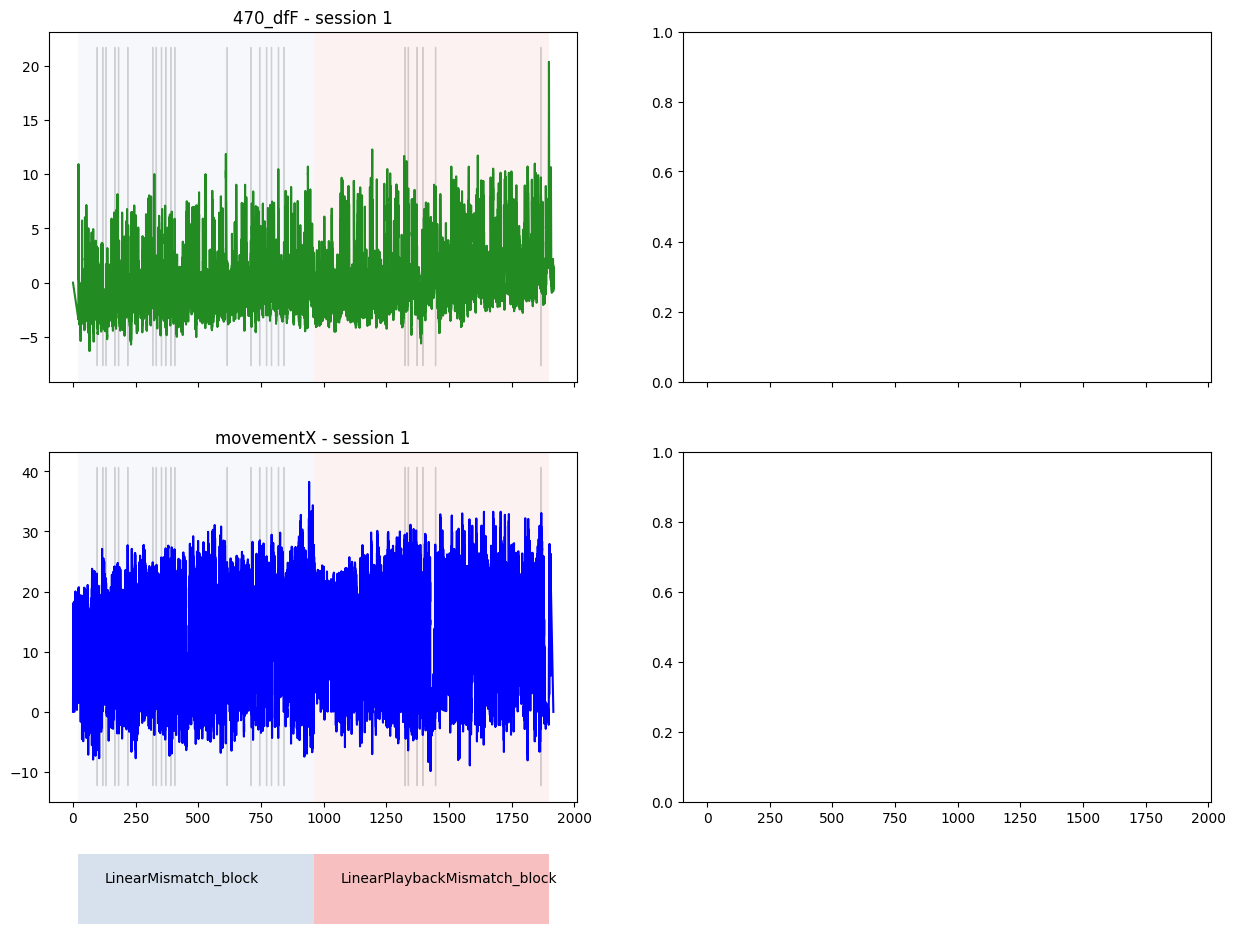

In [72]:
for mouse in B3M3_data_test.mouseID.unique():
    mousedata = {'session 1':B3M3_data_test.loc[B3M3_data_test.mouseID == mouse], 'session 2':None}
    fig, ax =view_session_mouse(mousedata, mouse)
    fig.savefig(f'GCaMP_{mouse}_view_alignment.png', format = 'png', dpi = 300)

In [76]:
#Filter mice to get unique indexes
mouse_data = {'session 1':{'closedloop': {},'openloop': {} }}

for mouse in GCaMP_MM_1.mouseID.unique():
    mouse_data['session 1']['closedloop'][mouse] = filter_data(GCaMP_MM_1, filters = [mouse, 'closed_block'])
    mouse_data['session 1']['openloop'][mouse] = filter_data(GCaMP_MM_1, filters = [mouse, 'open_block'])

In [78]:
mouse_data

{'session 1': {'closedloop': {'B3M3':           470_dfF  movementX  movementY   halt  \
   Seconds                                          
   21.340  -3.351995  12.730844   0.767793  False   
   21.341  -3.352152  12.760055   0.622500  False   
   21.342  -3.352309  12.791417   0.494149  False   
   21.343  -3.352466  12.822779   0.365799  False   
   21.344  -3.352623  12.854141   0.237448  False   
   ...           ...        ...        ...    ...   
   960.656  0.602436  11.155668   2.211479  False   
   960.657  0.629272  11.213911   2.237149  False   
   960.658  0.656108  11.272155   2.262819  False   
   960.659  0.682944  11.330398   2.288489  False   
   960.660  0.709780  11.391465   2.314160  False   
   
                                ExperimentEvents mouseID sex area  No_halt  \
   Seconds                                                                   
   21.340           LinearMismatch block started    B3M3   F   V1    False   
   21.341                             

In [79]:
#Aligning open and closed loop block data to halt start times
mouse_aligned = {'session 1':{'closedloop': {},'openloop': {} }}
move_speeds = {'session 1':{'closedloop': {},'openloop': {} }, 'session 2': {'closedloop': {},'openloop': {}}}

#Using the aling_to_event_start function, make sure that the sampling rate = 0.001, otherwise, change the sampling_rate variable in the function
for session, session_dict in mouse_data.items():
    for block, mice in session_dict.items():
        for mouse, df in mice.items():
            event_alinged, bsl_event_alinged, run_speeds = align_to_event_start(df, '470_dfF', 'halt',[1,2])
            mouse_aligned[session][block][mouse]  = bsl_event_alinged  #bsl indicates that it is baselined to the last 1 second before halt
            move_speeds[session][block][mouse]  = run_speeds
    

In [80]:
move_speeds['session 1']['closedloop']['B3M3']

,95.818,118.352,130.985,166.634,181.418,218.467,317.933,331.949,352.683,369.766,389.816,405.932,614.847,709.529,744.695,772.062,791.645,819.611,841.444
Mean_moveX,14.744543,15.799878,16.757349,19.381467,14.345534,20.950524,19.323828,10.710115,18.509980,21.361452,18.729783,18.513219,13.891035,19.652427,22.510123,13.452331,14.220951,2.985129,16.180404
Mean_moveY,2.121528,2.204030,1.962181,2.285663,2.037807,2.934917,2.746684,0.889179,2.401707,3.145091,2.258609,2.564559,1.843951,2.342072,2.852802,1.710975,2.095601,0.231315,2.340463


In [82]:

mouse_aligned['session 1']['openloop']['B3M3']

,1324.690,1337.889,1372.756,1395.772,1446.488,1866.951
-1.000,-1.020291,-1.561822,2.852688,-4.945418,1.814201,-0.008055
-0.999,-1.014847,-1.593672,2.826284,-4.939544,1.820866,-0.009055
-0.998,-1.009404,-1.625521,2.809534,-4.933671,1.827531,-0.010055
-0.997,-1.003960,-1.657371,2.793203,-4.927798,1.834196,-0.011055
-0.996,-0.998517,-1.689221,2.776872,-4.921924,1.840861,-0.012054
...,...,...,...,...,...,...
1.996,0.093901,0.139759,-5.081048,-4.218625,0.498441,0.508069
1.997,0.101947,0.139711,-5.089570,-4.189823,0.498059,0.495797
1.998,0.109993,0.139664,-5.098092,-4.161020,0.497677,0.483525
1.999,0.118039,0.139616,-5.106613,-4.132217,0.497295,0.471253


In [83]:
len(mouse_aligned['session 1']['closedloop'].keys())

1

In [84]:
mouse_aligned_nohalt = {'session 1':{'closedloop': {},'openloop': {} }, 'session 2': {'closedloop': {},'openloop': {}}}
move_speeds_nohalt = {'session 1':{'closedloop': {},'openloop': {} }, 'session 2': {'closedloop': {},'openloop': {}}}
for session, session_dict in mouse_data.items():
    for block, mice in session_dict.items():
        for mouse, df in mice.items():
            event_alinged, bsl_event_alinged, run_speeds = align_to_event_start(df, '470_dfF', 'No_halt',[1,2])
            mouse_aligned_nohalt[session][block][mouse] = bsl_event_alinged  #bsl indicates that it is baselined to the last 1 second before halt
            move_speeds_nohalt[session][block][mouse]  = run_speeds

In [87]:
mouse_aligned['session 1']

{'closedloop': {'B3M3':          95.818    118.352   130.985   166.634   181.418   218.467   317.933  \
  -1.000  0.942166 -1.730425  0.781997  1.690878  0.010837  0.305142  0.233791   
  -0.999  0.932807 -1.720207  0.775455  1.677843 -0.002486  0.285994  0.251268   
  -0.998  0.923447 -1.709988  0.768913  1.680210 -0.015808  0.266846  0.268745   
  -0.997  0.914088 -1.699769  0.762371  1.688827 -0.029131  0.247698  0.286222   
  -0.996  0.904729 -1.689551  0.755830  1.697444 -0.042453  0.228550  0.303698   
  ...          ...       ...       ...       ...       ...       ...       ...   
   1.996  3.322040 -3.530353 -0.797298  1.717059  0.572940  4.096184  0.335813   
   1.997  3.312471 -3.519657 -0.804031  1.703490  0.570702  4.090090  0.354285   
   1.998  3.302901 -3.508961 -0.810764  1.689922  0.568465  4.083996  0.372757   
   1.999  3.293332 -3.498265 -0.817497  1.676354  0.566227  4.077902  0.391229   
   2.000  3.283763 -3.487569 -0.824230  1.662786  0.563990  4.071808  0.4097

 Session 1 


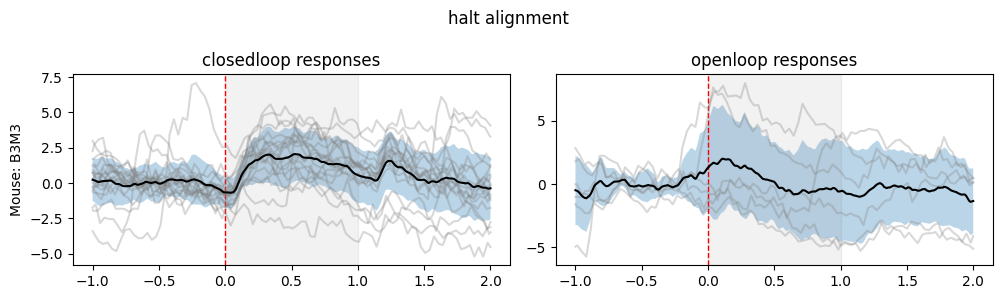

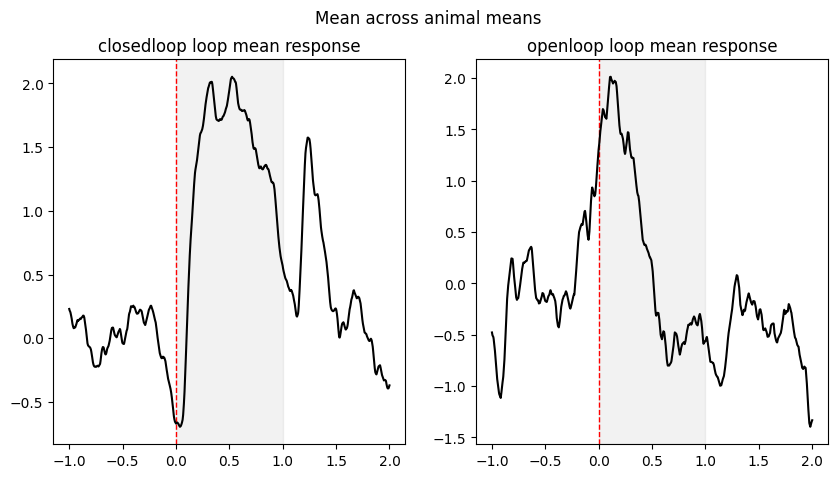

In [85]:
print('\033[1m Session 1 \033[0m')
mean_mouse_dict_s1 =plot_compare_blocks(mouse_aligned['session 1'], 'halt')


In [53]:
#print('\033[1m Session 2 \033[0m')
#mean_mouse_dict_s2 =plot_compare_blocks(mouse_aligned['session 2'], 'halt')

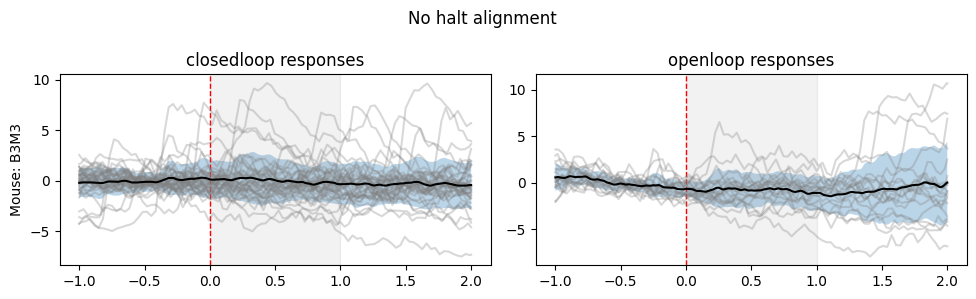

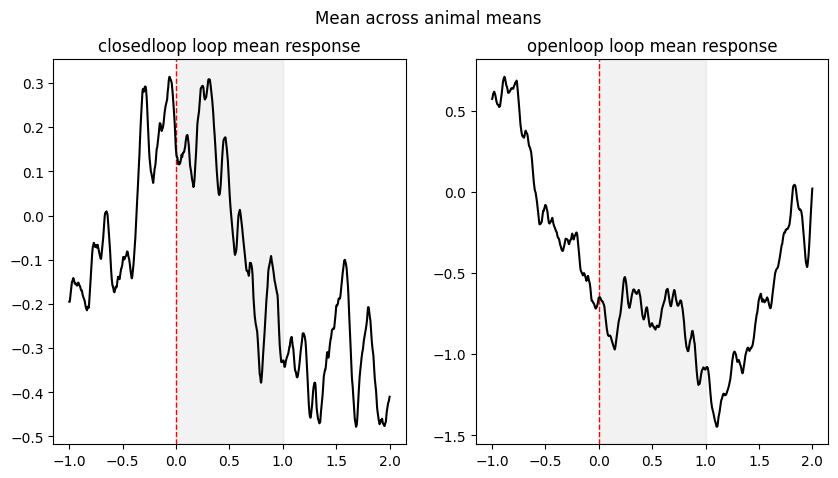

In [54]:
mean_mouse_dict_s1_nohalt =plot_compare_blocks(mouse_aligned_nohalt['session 1'], 'No halt')

In [55]:
mouse_aligned['session 1']['openloop']['B3M3']

,1324.690,1337.889,1372.756,1395.772,1446.488,1866.951
-1.000,-1.020291,-1.561822,2.852688,-4.945418,1.814201,-0.008055
-0.999,-1.014847,-1.593672,2.826284,-4.939544,1.820866,-0.009055
-0.998,-1.009404,-1.625521,2.809534,-4.933671,1.827531,-0.010055
-0.997,-1.003960,-1.657371,2.793203,-4.927798,1.834196,-0.011055
-0.996,-0.998517,-1.689221,2.776872,-4.921924,1.840861,-0.012054
...,...,...,...,...,...,...
1.996,0.093901,0.139759,-5.081048,-4.218625,0.498441,0.508069
1.997,0.101947,0.139711,-5.089570,-4.189823,0.498059,0.495797
1.998,0.109993,0.139664,-5.098092,-4.161020,0.497677,0.483525
1.999,0.118039,0.139616,-5.106613,-4.132217,0.497295,0.471253


In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mouse_sessions(
    mouse_aligned,
    mouse_aligned_nohalt,
    block_names,
    title="Mouse Sessions",
    stimulus_duration=1,
):
    """
    Plot session-specific traces for each mouse with control data.

    Parameters:
    - mouse_aligned (dict): Dictionary containing session data.
    - mouse_aligned_nohalt (dict): Dictionary containing control data.
    - block_names (list): List of block names (e.g., ['openloop', 'closedloop']) to plot.
    - title (str): Title prefix for each mouse figure.
    - stimulus_duration (float): Duration of the stimulus in seconds (default: 1 second).
    """
    mice = set()
    sessions = mouse_aligned.keys()

    # Collect all mice
    for session in mouse_aligned.values():
        for block in block_names:
            mice.update(session[block].keys())

    for mouse in mice:
        # Create a figure for each mouse
        fig, axes = plt.subplots(1, len(block_names), figsize=(5 * len(block_names), 4))
        axes = np.atleast_1d(axes)  # Ensure axes is iterable
        fig.suptitle(f"{title}: {mouse}")

        for i, block in enumerate(block_names):
            ax = axes[i]
            ax.spines[['right', 'top']].set_visible(False)

            # Plot control data (averaged across sessions)
            control_data = []
            for session in mouse_aligned_nohalt.values():
                if block in session and mouse in session[block]:
                    control_data.append(session[block][mouse])

            if control_data:
                # Ensure all arrays have the same length and use their time index
                valid_control_data = [
                    arr for arr in control_data if arr.shape[0] > 0
                ]
                if valid_control_data:
                    time_index = valid_control_data[0].index
                    control_data_concat = np.concatenate(valid_control_data, axis=1)
                    control_mean = control_data_concat.mean(axis=1)
                    control_std = control_data_concat.std(axis=1)
                    ax.plot(
                        time_index,
                        control_mean,
                        label="Control",
                        color="black",
                    )
                    ax.fill_between(
                        time_index,
                        control_mean - control_std,
                        control_mean + control_std,
                        color="black",
                        alpha=0.1,
                    )

            # Plot main traces for each session
            for session_name, session in mouse_aligned.items():
                if block in session and mouse in session[block]:
                    main_data = session[block][mouse]
                    time_index = main_data.index
                    main_mean = main_data.mean(axis=1)
                    main_std = main_data.std(axis=1)
                    ax.plot(
                        time_index,
                        main_mean,
                        label=f"{session_name}",
                        alpha=0.8,
                    )
                    ax.fill_between(
                        time_index,
                        main_mean - main_std,
                        main_mean + main_std,
                        alpha=0.3,
                    )

            # Shade the stimulus area
            ax.axvline(0, color="grey", linestyle="--")
            ax.axvspan(
                0,
                stimulus_duration,
                color="grey",
                alpha=0.1,
                label="Stimulus",
            )

            ax.set_title(f"{block} Block")
            ax.legend()

        plt.tight_layout()
        plt.show()
        plt.close(fig)  # Clear the figure after displaying it


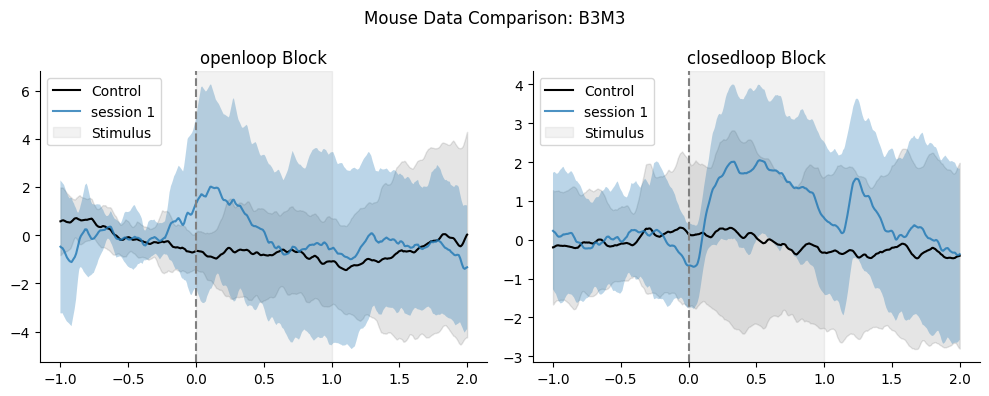

In [57]:
plot_mouse_sessions(
    mouse_aligned,
    mouse_aligned_nohalt,
    block_names=['openloop', 'closedloop'],
    title="Mouse Data Comparison",
    stimulus_duration=1,
)


In [88]:
def plot_mean_across_blocks(session_blocks, control_blocks, title="Mean Across Blocks", stimulus_duration = 1):
    """
    Plot a single figure with the mean across mouse means for each block.
    
    Parameters:
    - session_blocks (dict): Dictionary of session data, where keys are block names
                             and values are dictionaries of mouse data.
    - control_blocks (dict): Dictionary of control data with the same structure.
    - title (str): Title of the plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.spines[['right', 'top']].set_visible(False)

    for block_name, mouse_data in session_blocks.items():
        if not mouse_data:
            print(f"No data for block: {block_name}")
            continue

        # Compute mean and std across all mice
        block_means = [data.mean(axis=1) for data in mouse_data.values()]
        mean_across_mice = pd.concat(block_means, axis=1).mean(axis=1)
        std_across_mice = pd.concat(block_means, axis=1).std(axis=1)

        # Plot block trace
        ax.plot(mean_across_mice, label=f'{block_name} Mean')
        ax.fill_between(
            mean_across_mice.index,
            mean_across_mice - std_across_mice,
            mean_across_mice + std_across_mice,
            alpha=0.2,
        )

    # Plot control trace
    if control_blocks:
        control_means = [
            data.mean(axis=1) for block_data in control_blocks.values()
            for data in block_data.values()
        ]
        control_mean = pd.concat(control_means, axis=1).mean(axis=1)
        control_std = pd.concat(control_means, axis=1).std(axis=1)

        ax.plot(control_mean, label="Control Mean", color='black', linestyle='--')
        ax.fill_between(
            control_mean.index,
            control_mean - control_std,
            control_mean + control_std,
            color='grey',
            alpha=0.3,
        )

    ax.axvline(0, color='grey', linestyle='--')
    ax.axvspan(0, stimulus_duration, color='grey', alpha=0.1)
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()


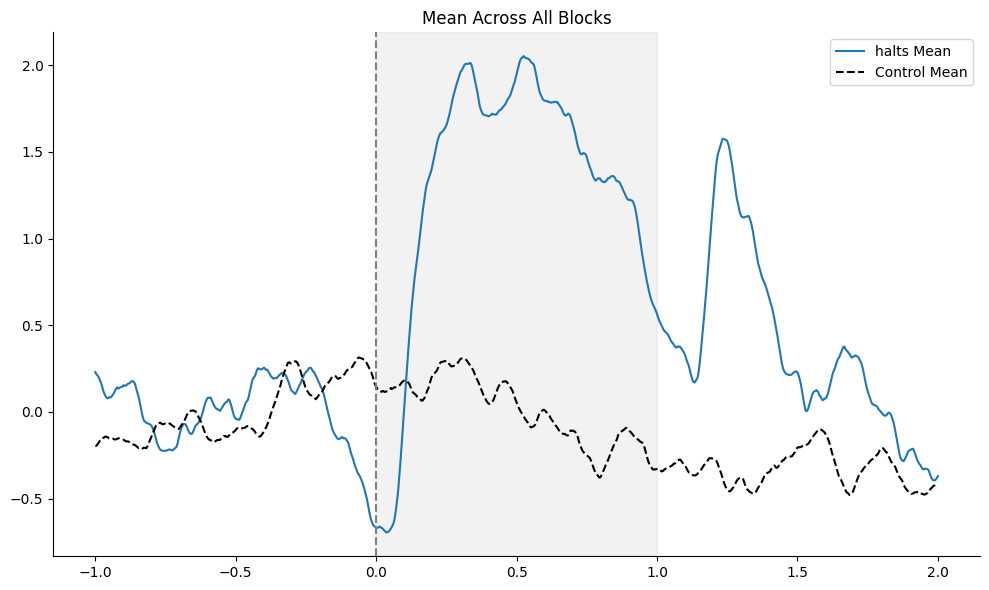

In [93]:
session_blocks ={'halts':mouse_aligned['session 1']['closedloop']}
control_blocks = {'control': mouse_aligned_nohalt['session 1']['closedloop']}

plot_mean_across_blocks(session_blocks, control_blocks, title="Mean Across All Blocks")


In [74]:
sessions = mouse_aligned.keys()


In [60]:
def extract_aligned_vars(aligned_data_dict, aligned_movement_dict):
    # Initialize an empty list to store results
    results = []
    
    for session_number, session_blocks in aligned_data_dict.items():
        for session_block, mice_data in session_blocks.items():
            for mouse_id, item in mice_data.items():
                run_df = aligned_movement_dict[session_number][session_block][mouse_id]
                # Check if the item is a DataFrame
                if not isinstance(item, pd.DataFrame):
                    print(f"Warning: The data for Mouse ID '{mouse_id}' in session '{session_number}' and block '{session_block}' is not a DataFrame. Skipping.")
                    continue

                # Copy the DataFrame and ensure the index is numeric
                df = item.copy()
                df.index = pd.to_numeric(df.index)

                # Process each column independently
                for column in df.columns:
                    event_time_data = df.loc[0:1, column]  # Data during the event (0 to +1 seconds)
                    post_event_data = df.loc[1:2, column]  # Data during the first second after the event (+1 to +2 seconds)

                    peak_response = event_time_data.max()  # Max response during the event
                    min_response = event_time_data.min()  # Minimum response during the event
                    mean_response_event = event_time_data.mean()  # Mean response during the event
                    mean_response_post_event = post_event_data.mean()  # Mean response during the post-event time
                    min_response_post_event = post_event_data.min()  #Minimum response during the post-event time
                    peak_response_post_event = post_event_data.max() #Maximum response during the post-event time

                    #Given Mean_moveX and Y being the row names in the movement df, the 1 second pre halt movement speeds are added
                    x_move = run_df.loc['Mean_moveX', column]
                    y_move = run_df.loc['Mean_moveY', column]
    
                    #add results to list of dicts
                    results.append({
                        "SessionNumber": session_number,
                        "SessionBlock": session_block,
                        "MouseID": mouse_id,
                        "EventTime": column,
                        "moveX": x_move,
                        "moveY": y_move,
                        "PeakResponse": peak_response,
                        "MinResponse":  min_response,
                        "MeanResponse": mean_response_event,
                        "MeanResponse_after": mean_response_post_event,
                        "MinResponse_after": min_response_post_event,
                        "PeakResponse_after": peak_response_post_event
                    })

    # convert to a pandas df
    output_df = pd.DataFrame(results)
    return output_df



In [61]:
extracted_variables = extract_aligned_vars(mouse_aligned, move_speeds)


In [62]:
extracted_variables_nohalt = extract_aligned_vars(mouse_aligned_nohalt, move_speeds_nohalt)


In [63]:
extracted_variables_nohalt['event']='no halt'
extracted_variables['event']='halt'
combined_vars = pd.concat([extracted_variables_nohalt, extracted_variables])

combined_vars.to_csv('B3M3_GCaAMP_MM_extracted_vars.csv', index=False)

In [64]:
combined_vars

,SessionNumber,SessionBlock,MouseID,EventTime,moveX,moveY,PeakResponse,MinResponse,MeanResponse,MeanResponse_after,MinResponse_after,PeakResponse_after,event
0,session 1,closedloop,B3M3,38.365,9.690783,1.228625,1.283329,-1.051281,0.005291,0.065360,-1.095571,1.412985,no halt
1,session 1,closedloop,B3M3,56.698,11.256987,1.538512,1.220033,-0.762222,0.369021,0.527428,-1.046167,2.177290,no halt
2,session 1,closedloop,B3M3,78.390,16.537915,2.100871,2.224379,-0.431520,0.968197,0.169214,-0.931315,3.162112,no halt
3,session 1,closedloop,B3M3,151.100,10.439419,1.612552,1.222908,-1.901378,-0.635937,-0.904639,-2.214779,0.323186,no halt
4,session 1,closedloop,B3M3,198.910,6.484053,0.897708,2.913811,-0.372577,1.491954,-0.188658,-1.388256,1.853918,no halt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,session 1,openloop,B3M3,1337.889,2.574544,0.089028,7.652346,0.801736,3.439234,1.403068,-0.289626,2.897541,halt
21,session 1,openloop,B3M3,1372.756,21.791424,3.055617,0.504183,-4.864530,-2.102400,-3.873565,-5.115135,-2.885157,halt
22,session 1,openloop,B3M3,1395.772,5.914239,0.720202,-0.340778,-5.175900,-3.135656,-4.107260,-5.270373,-2.871123,halt
23,session 1,openloop,B3M3,1446.488,20.943900,2.476910,3.846774,-2.687620,-0.800715,1.410000,0.040033,3.792515,halt


In [29]:
##Consider adding to the fitted model a continous variable which is the time column
#EventTime should currently be seconds from session start

# Look for correlation between running and fluorescence changes

In [82]:


# Compute Pearson correlation
pearson_corr, pearson_pval = pearsonr(B3M3_data_test['movementX'], B3M3_data_test['470_dfF'])

# Compute Spearman correlation (handles nonlinear relationships better)
spearman_corr, spearman_pval = spearmanr(B3M3_data_test['movementX'], B3M3_data_test['470_dfF'])

print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")


Pearson correlation: 0.099914136172009, p-value: 0.0
Spearman correlation: 0.09330119040646519, p-value: 0.0


In [89]:
for mouse in B3M3_data_test.mouseID.unique():
    subset = filter_data(B3M3_data_test, [mouse, 'day1'])
    # Compute Pearson correlation
    pearson_corr, pearson_pval = pearsonr(subset['movementX'], subset['470_dfF'])
    
    # Compute Spearman correlation (handles nonlinear relationships better)
    spearman_corr, spearman_pval = spearmanr(subset['movementX'], subset['470_dfF'])
    print(f'\n \033[1m {mouse} \033[0m \n')
    print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
    print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")
    
    resampled = subset.sample(10000, random_state=9)  # Sample 10,000 rows
    pearson_corr, pearson_pval = pearsonr(resampled['movementX'], resampled['470_dfF'])
    spearman_corr, spearman_pval = spearmanr(resampled['movementX'], resampled['470_dfF'])
    print('\n Random 1000 samples: \n')
    print(f"Subset Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
    print(f"Subset Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")


  B2M5  

Pearson correlation: -0.042871320641290074, p-value: 0.0
Spearman correlation: -0.0358020843657191, p-value: 0.0

 Random 1000 samples: 

Subset Pearson correlation: -0.07142083705835331, p-value: 8.657400487270384e-13
Subset Spearman correlation: -0.06449245093346677, p-value: 1.0810512190421847e-10

  B2M4  

Pearson correlation: 0.05359865520672742, p-value: 0.0
Spearman correlation: 0.07292023810385802, p-value: 0.0

 Random 1000 samples: 

Subset Pearson correlation: 0.030590574637868753, p-value: 0.002217874837328651
Subset Spearman correlation: 0.05382136753987481, p-value: 7.229686473476265e-08

  B3M3  

Pearson correlation: 0.048391086665586155, p-value: 0.0
Spearman correlation: 0.050187507372998465, p-value: 0.0

 Random 1000 samples: 

Subset Pearson correlation: 0.039824517560441405, p-value: 6.789791536678349e-05
Subset Spearman correlation: 0.030880948887464798, p-value: 0.002012066785174758

  B3M1  

Pearson correlation: 0.30387613614721787, p-value: 0.0
Sp

In [143]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

def correlation_remove(data, fluorescence="470_dfF", movement=["movementX", "movementY"], chunk_size=100000):
    """
    Remove the effect of movement from the fluorescence signal using linear regression.

    Parameters:
    - data (DataFrame): The input data containing fluorescence and movement data.
    - fluorescence (str): Column name of the fluorescence signal.
    - movement (list): List of column names representing movement data.
    - chunk_size (int): Number of rows to process at a time to handle memory constraints.

    Returns:
    - detrended_df (DataFrame): A DataFrame with the detrended fluorescence signal.
    """
    detrended_data = []

    # Combine multiple movement columns into a single column
    if len(movement) > 1:
        data['movement_combined'] = data[movement].sum(axis=1)
        movement_col = 'movement_combined'
    else:
        movement_col = movement[0]

    # Process data in chunks
    for start in range(0, len(data), chunk_size):
        end = start + chunk_size
        chunk = data.iloc[start:end].copy()  # Ensure we work on a copy

        # Skip chunks with identical or missing movement values
        if chunk[movement_col].nunique() <= 1:  # All values are identical or missing
            print(f"Skipping chunk {start}-{end} due to insufficient variability in {movement_col}")
            continue

        # Perform linear regression
        slope, intercept, _, _, _ = linregress(chunk[movement_col], chunk[fluorescence])

        # Remove the effect of movement
        chunk[f"{fluorescence}_detrended"] = chunk[fluorescence] - (slope * chunk[movement_col] + intercept)

        # Append the detrended data
        detrended_data.append(chunk[[f"{fluorescence}_detrended"]])

    # Combine all processed chunks
    if detrended_data:
        detrended_df = pd.concat(detrended_data, axis=0)
    else:
        raise ValueError("No valid data found for detrending.")

    # Plot comparison
    fig, ax = plt.subplots(3, figsize=(15, 6))
    ax[0].plot(data.index, data[fluorescence], label="Original Fluorescence", alpha=0.5)
    if not detrended_df.empty:
        ax[0].plot(detrended_df.index, detrended_df[f"{fluorescence}_detrended"], label="Detrended Fluorescence", alpha=0.8)
    ax[1].plot(data.index, data[movement[0]])
    ax[2].plot(data.index, data[movement[1]])
    ax[0].set_title("Fluorescence Signal Before and After Movement Correction")
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Fluorescence Signal")
    ax[0].legend()
    plt.show()

    return detrended_df


/Users/hildeteigen/opt/anaconda3/envs/aeon/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


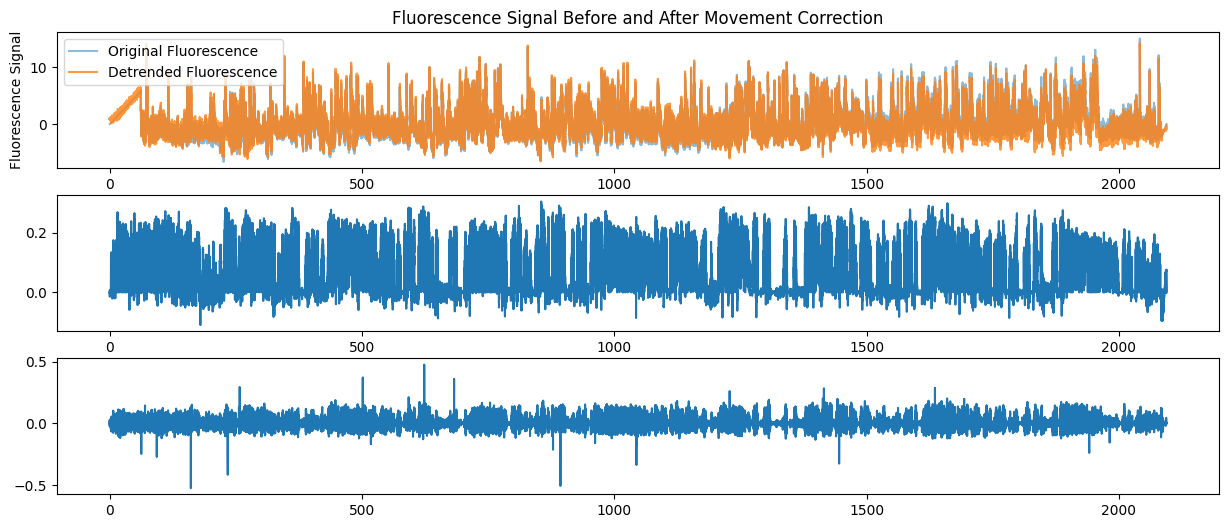

In [144]:
subset = filter_data(B3M3_data_test, ['B3M3', 'day1'])

detrended_data = correlation_remove(subset, fluorescence="470_dfF", movement=["movementX", "movementY"], chunk_size=300000)


In [ ]:
p

In [109]:
subset

,470_dfF,movementX,movementY,halt,ExperimentEvents,Experiment,Session,mouseID,sex,area,No_halt,LinearMismatch_block,LinearPlaybackMismatch_block
Seconds,,,,,,,,,,,,,
0.000,-0.000003,0.015121,0.003040,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
0.001,-0.000010,0.048723,0.009795,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
0.002,-0.000016,0.082325,0.016550,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
0.003,-0.000023,0.115569,0.023246,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
0.004,-0.000029,0.126261,0.026171,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124.006,0.001038,0.000000,0.000000,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
2124.007,0.000746,0.000000,0.000000,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
2124.008,0.000453,0.000000,0.000000,False,NaN,MMclosed-and-open,day1,B3M2,M,V2M,False,False,False
